In [1]:
using SymPy, Latexify, Plots

# Problem 1

## Part (a)
The characteristic equation is 

$$
r^4 + (2 - 2\sqrt{3}) r^3 + (6 - 4\sqrt{3}) r^2 + (8 - 4\sqrt{3})r + 8 = 0
$$

and we need to solve it to get solutions of the difference equation

In [2]:
# Part (a)
@vars r n
# We need to "sympify" the 3 so that sqrt(3) is treated as a symbol and not evaluated to a floating point
roots = solve(r^4 + (2 - 2*sqrt(sympify(3)))*r^3 + (6 - 4*sqrt(sympify(3)))*r^2 + (8 - 4*sqrt(sympify(3)))*r + 8 ~ 0, r)

4-element Vector{Sym}:
      -1 - ⅈ
      -1 + ⅈ
 √3 - ⅈ
 √3 + ⅈ

Recall that if $z = \alpha + i \beta$ is a solution to the characteristic equation then

$$
\begin{align*}
z^n &= \left( \alpha + i \beta \right)^n \\
&= r^n e^{in \theta} \\
&= r^n (\cos(n\theta) + i \sin(n\theta))
\end{align*}
$$

is a solution to the difference equation where $r$ is the length of $z$ and $\theta$ is the argument of $z$. Taking the real and imaginary parts yields two independent solutions.

In [3]:
arg = sympy.functions.elementary.complexes.arg

r1 = abs(roots[1])
θ1 = arg(roots[1])

r2 = abs(roots[3])
θ2 = arg(roots[3])
# Solutions
solutions = [r1^n * cos(n * θ1), r1^n * sin(n * θ1), r2^n * cos(n * θ2), r2^n * sin(n * θ2)]

4-element Vector{Sym}:
  2^(n/2)*cos(3*pi*n/4)
 -2^(n/2)*sin(3*pi*n/4)
        2^n*cos(pi*n/6)
       -2^n*sin(pi*n/6)

# Part (b)
To check if our 4 solutions $x_1(n), x_2(n), x_3(n), x_4(n)$ are independent we need to compute the [Casoratian](https://mathworld.wolfram.com/Casoratian.html) and check if it is $0$.

$$
\begin{vmatrix}
x_1(n) & x_2(n) & x_3(n) & x_4(n) \\
x_1(n+1) & x_2(n+1) & x_3(n+1) & x_4(n+1) \\
x_1(n+2) & x_2(n+2) & x_3(n+2) & x_4(n+2) \\
x_1(n+3) & x_2(n+3) & x_3(n+3) & x_4(n+3) \\
\end{vmatrix}

\stackrel{?}{=} 0
$$

In [6]:
# Generate Casoratian
k = length(solutions)
casoratian = zeros(Sym, k, k)
for i = 0:k-1
    casoratian[begin+i, :] = @.subs(solutions, n => n+i)
end
casoratian

4×4 Matrix{Sym}:
               2^(n/2)*cos(3*pi*n/4)  …                -2^n*sin(pi*n/6)
 2^(n/2 + 1/2)*cos(pi*(3*n/4 + 3/4))     -2^(n + 1)*sin(pi*(n/6 + 1/6))
   2^(n/2 + 1)*cos(pi*(3*n/4 + 3/2))     -2^(n + 2)*sin(pi*(n/6 + 1/3))
 2^(n/2 + 3/2)*cos(pi*(3*n/4 + 9/4))     -2^(n + 3)*sin(pi*(n/6 + 1/2))

In [7]:
# Check determinant
simplify(casoratian.det())

 3⋅n + 3              
2       ⋅(3⋅√3 + 11/2)

The determinant is not $0$ which means our 4 solutions are independent.

## Part (c)
We have 4 independent solutions $x_1(n), x_2(n), x_3(n), x_4(n)$. The general solution is thus 

$$
c_1 x_1(n) + c_2 x_2(n) + c_3 x_3(n) + c_4 x_4(n)
$$

where $c_1, c_2, c_3, c_4$ are some constant. 

In [8]:
cs = [Sym("c_$(i)") for i = 1:length(solutions)]

general_solution = sum([cs[i] * solutions[i] for i = 1:length(solutions)])

 n                  n                                                
 ─                  ─                                                
 2       ⎛3⋅π⋅n⎞    2       ⎛3⋅π⋅n⎞    n       ⎛π⋅n⎞    n       ⎛π⋅n⎞
2 ⋅c₁⋅cos⎜─────⎟ - 2 ⋅c₂⋅sin⎜─────⎟ + 2 ⋅c₃⋅cos⎜───⎟ - 2 ⋅c₄⋅sin⎜───⎟
         ⎝  4  ⎠            ⎝  4  ⎠            ⎝ 6 ⎠            ⎝ 6 ⎠

To solve this problem we need to solve for these constants given the initial condition.

In [9]:
solved_cs = solve([
    general_solution(n => 0) ~ 1//4
    general_solution(n => -1) ~ 1//4
    general_solution(n => -2) ~ 1//4
    general_solution(n => -3) ~ 1//4
], cs)

Dict{Any, Any} with 4 entries:
  c_1 => 1/4
  c_4 => 10 - 5*sqrt(3)
  c_3 => 0
  c_2 => -17/4 + 5*sqrt(3)/2

We have solve for the constants making the final solution

In [10]:
solution = subs(general_solution, solved_cs)

                                 n                                     
                                 ─                                     
   n                             2    ⎛3⋅π⋅n⎞                          
   ─                            2 ⋅cos⎜─────⎟                          
   2 ⎛  17   5⋅√3⎞    ⎛3⋅π⋅n⎞         ⎝  4  ⎠    n                ⎛π⋅n⎞
- 2 ⋅⎜- ── + ────⎟⋅sin⎜─────⎟ + ───────────── - 2 ⋅(10 - 5⋅√3)⋅sin⎜───⎟
     ⎝  4     2  ⎠    ⎝  4  ⎠         4                           ⎝ 6 ⎠

## Part (d)
Plotting for $n = 1 \ldots 20$ we get

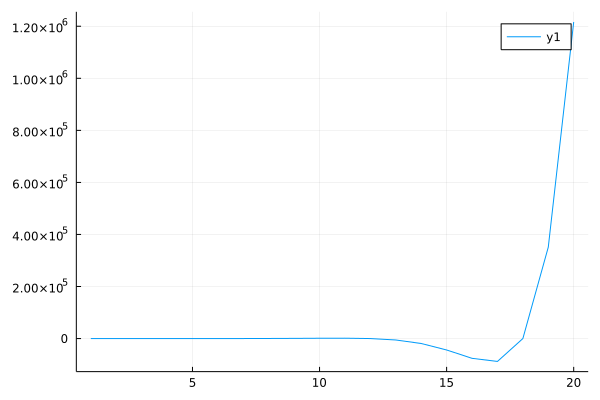

In [9]:
plot(solution, 1:20)

For $n = 1 \ldots 40$ we get

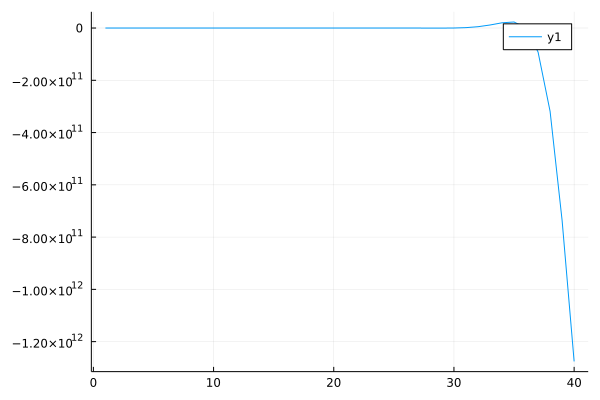

In [10]:
plot(solution, 1:40)

For $n = 1 \ldots 60$ we get

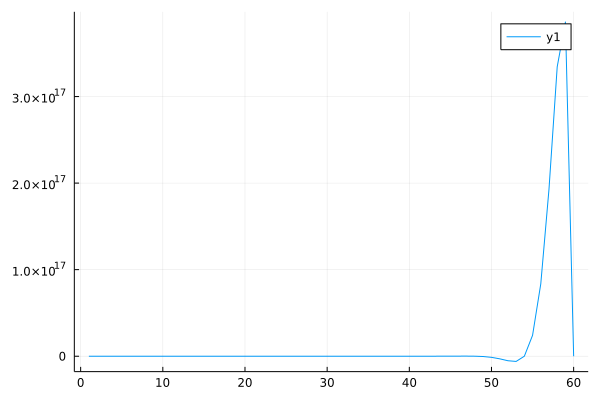

In [11]:
plot(solution, 1:60)

# Problem 2
First we need to solve the homogeneous difference equation

$$
na_{n+2} - (n+1)a_{n+1} + a_n = 0
$$

Unfortunately SymPy is unable to properly solve this difference equation as seen below where we get only one solution

In [14]:
a = SymFunction("a")

f = n*a(n+2) - (n+1)*a(n+1) + a(n)
rsolve(f, a(n))

C₀

Therefore we resort to [WolframAlpha](https://www.wolframalpha.com/input/?i=n*a%28n%2B2%29+-+%28n%2B1%29*a%28n%2B1%29+%2B+a%28n%29+%3D+0) and we see that the fundamental solutions have the form

$$
a_n = c_1 + c_2 \frac{e \cdot \Gamma(n-1, 1)}{\Gamma(n-1)}
$$

where $c_1, c_2$ are constants and $\Gamma(a, x)$ is the [incomplete gamma function](https://en.wikipedia.org/wiki/Incomplete_gamma_function)

It is pretty obvious that the constant solution works as

$$
nA - (n+1)A + A = 0
$$

but the second solution is not clear. Thus, we empirically demonstrate that the second solution involving the gamma function is a solution (SymPy fails to simplify the substituted solution down to a $0$).

In [15]:
uppergamma = sympy.functions.special.gamma_functions.uppergamma
a = n -> sympy.E * uppergamma(n-1, 1) / sympy.gamma(n-1)

f = n*a(n+2) - (n+1)*a(n+1) + a(n)
println([convert(Float64, f(n => i)) for i=0:200])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

Equipped with our fundamental solutions, we can now use variation of parameters to solve the difference equation

$$
na_{n+2} - (n+1)a_{n+1} + a_n = \frac{1}{n+1}
$$

which in standard form is

$$
a_{n+2} - \frac{n+1}{n}a_{n+1} + \frac{1}{n}a_n = \frac{1}{n(n+1)}
$$

It should from here be noted that the difference equation is no longer well-defined when $n=0$. Thus we will come up with a solution $a_n$ for $n \geq 1$.

In [17]:
# Encode first fundamental solution
c1 = Sym("c_1")
solution1 = n -> sympify(1)

# Encode second fundamental solution
c2 = Sym("c_2")
solution2 = n -> sympy.E * uppergamma(n-1, 1) / sympy.gamma(n-1)

# Encode RHS of the difference equation
f = n -> 1 / (n*(n + 1))

casoratian = n -> [solution1(n) solution2(n); solution1(n+1) solution2(n+1)].det()

Σ = sympy.concrete.summations.Sum

# Use variation of parameters formula to get a general solution
@vars j
general_solution = n ->
    c1*solution1(n) +
    c2*solution2(n) +
    # Notice the index of the sum starts at 1 and not 0 because the difference equation is not well defined at n=0
    solution2(n) * Σ(solution1(j+1) * f(j) / casoratian(j+1), (j, 1, n-1)) -
    solution1(n) * Σ(solution2(j+1) * f(j) / casoratian(j+1), (j, 1, n-1))

general_solution(n)

                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                                                                              
                        n - 1                                              ℯ⋅Γ
                        _____                                                 
                        ╲                                                     
                         ╲                                                    
                          ╲                   ℯ⋅Γ(j, 1)                       
     ℯ⋅c₂⋅Γ(n - 1, 1)      ╲  ──────────────────────────────────────────      
c₁ + ──────────────── -    ╱            ⎛ℯ⋅Γ(j + 1, 

Let's empirically verify this solution by plugging in some values of $n$.

In [18]:
difference_eq_lhs = n*general_solution(n+2) - (n+1)*general_solution(n+1) + general_solution(n)
println([difference_eq_lhs(n => i).doit() for i = 1:100])

Sym[1/2, 1/3, 1/4, 1/5, 1/6, 1/7, 1/8, 1/9, 1/10, 1/11, 1/12, 1/13, 1/14, 1/15, 1/16, 1/17, 1/18, 1/19, 1/20, 1/21, 1/22, 1/23, 1/24, 1/25, 1/26, 1/27, 1/28, 1/29, 1/30, 1/31, 1/32, 1/33, 1/34, 1/35, 1/36, 1/37, 1/38, 1/39, 1/40, 1/41, 1/42, 1/43, 1/44, 1/45, 1/46, 1/47, 1/48, 1/49, 1/50, 1/51, 1/52, 1/53, 1/54, 1/55, 1/56, 1/57, 1/58, 1/59, 1/60, 1/61, 1/62, 1/63, 1/64, 1/65, 1/66, 1/67, 1/68, 1/69, 1/70, 1/71, 1/72, 1/73, 1/74, 1/75, 1/76, 1/77, 1/78, 1/79, 1/80, 1/81, 1/82, 1/83, 1/84, 1/85, 1/86, 1/87, 1/88, 1/89, 1/90, 1/91, 1/92, 1/93, 1/94, 1/95, 1/96, 1/97, 1/98, 1/99, 1/100, 1/101]


The above output is convincing evidence that we have the correct general solution.

# Problem 3

## Part (a)
This differential equation is separable where rewriting it yields

$$
e^y dy = \frac{e^x}{(1+e^x)^2} dx
$$

which implies that

$$
e^y = -(1+e^x)^{-1} + C
$$

Therefore, the general solution is

$$
y = \ln (C - (1+e^x)^{-1})
$$

To solve for $C$ we put in the initial condition $y(0) = 1$.

$$
\begin{align*}
    1 &= \ln(C - \frac{1}{2}) \\
    C - \frac{1}{2} &= e
\end{align*}
$$

which implies $C = e + \frac{1}{2}$. Thus the final exact solution is 

$$
y = \ln (e + \frac{1}{2} - (1+e^x)^{-1})
$$

## Part (b)
To compute the first 4 Taylor polynomial approximations, we compute successive derivatives

In [19]:
@vars x
y = SymFunction("y")

y_derivatives = [y(x), exp(x - y(x))/(1 + exp(x))^2]

for i = length(y_derivatives):4
    last_computed_derivative = last(y_derivatives)
    push!(y_derivatives, diff(last_computed_derivative, x))
end

# Display derivatives
[diff(y(x), (x,i)) ~ y_derivatives[begin + i] for i = 0:length(y_derivatives) - 1]

5-element Vector{Sym}:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         True
                                                                                                                                                                                                                                                                                                                                                                   

We have computed successive derivatives above and now we substitute the initial condition

In [20]:
x0 = 0
y0 = 1
initial_conditions = [y(x0) => sympify(y0)]
taylor_approximations = [sympify(y0)]

for (i, y_derivative) in enumerate(y_derivatives[2:end])
    # Compute the next derivative at x0 by using previous data
    next_derivative = diff(y(x), (x, i))(x0)
    next_derivative_value = simplify(subs(y_derivative, x=>x0, initial_conditions...))
    push!(initial_conditions, next_derivative => next_derivative_value)
    # Generate the successive taylor approximations as we go
    push!(taylor_approximations, last(taylor_approximations) + next_derivative_value / factorial(i) * x^i)
end
# Display the initial conditions
map(pair -> pair[1] ~ pair[2], initial_conditions)

5-element Vector{Sym}:
                                                            y(0) = 1
                         Eq(Subs(Derivative(y(x), x), x, 0), exp(-1)/4)
                  Eq(Subs(Derivative(y(x), (x, 2)), x, 0), -exp(-2)/16)
    Eq(Subs(Derivative(y(x), (x, 3)), x, 0), (1/32 - exp(2)/8)*exp(-3))
 Eq(Subs(Derivative(y(x), (x, 4)), x, 0), (-3 + 16*exp(2))*exp(-4)/128)

The Taylor approximations are

In [21]:
taylor_approximations

5-element Vector{Sym}:
                                                                                                      1
                                                                                        x*exp(-1)/4 + 1
                                                                      -x^2*exp(-2)/32 + x*exp(-1)/4 + 1
                                     x^3*(1/32 - exp(2)/8)*exp(-3)/6 - x^2*exp(-2)/32 + x*exp(-1)/4 + 1
 x^4*(-3 + 16*exp(2))*exp(-4)/3072 + x^3*(1/32 - exp(2)/8)*exp(-3)/6 - x^2*exp(-2)/32 + x*exp(-1)/4 + 1

Because we know the exact solution, we can compute the errors of the approximations

In [22]:
exact_solution = ln(sympy.E + 1//2 - 1/(1 + exp(x)))

   ⎛1         1   ⎞
log⎜─ + ℯ - ──────⎟
   ⎜2        x    ⎟
   ⎝        ℯ  + 1⎠

At $x = 1$ the (absolute) errors are

In [23]:
exact_solution_float = exact_solution(x => 1).evalf()
map(expr -> abs(exact_solution_float - expr(x => 1).evalf()), taylor_approximations)

5-element Vector{Sym}:
   0.0815815545343039
   0.0103883057585568
  0.00615907815741257
  0.00124576921924335
 0.000558784318488215

where the entry at index `i` corresponds to the error for the Taylor approximation in `taylor_approximations` at index `i`.

Similarly the (absolute) errors at $x=2$ are

In [24]:
exact_solution_float = exact_solution(x => 2).evalf()
map(expr -> abs(exact_solution_float - expr(x => 2).evalf()), taylor_approximations)

5-element Vector{Sym}:
  0.131104940384311
 0.0528347802014102
 0.0359178697968336
 0.0233209092164124
 0.0123291508043313

It is worth noting that higher order approximations yield better results and that as we move away from $x_0$ the approximation gets worse. These phenomena are clearly seen in the data.

# Problem 4

We assume that a solution will have the form

$$
y = \sum_{n=0}^\infty a_n x^{\alpha + n}
$$

as $x=0$ is a regular singular point of the differential equation.

We encode the general solution and LHS of the differential equation in Julia and tell the ODE solver to use [Frobenius's method](https://github.com/sympy/sympy/blob/46e00feeef5204d896a2fbec65390bd4145c3902/sympy/solvers/ode/ode.py#L3536-L3656). 

In [25]:
diff_eq_lhs = x^2 * diff(y(x), (x, 2)) + x * diff(y(x), x) + (x^2 - 1) * y(x)

dsolve(diff_eq_lhs, hint="2nd_power_series_regular", n=10)

            ⎛   8       6      4    2    ⎞         
            ⎜  x       x      x    x     ⎟    ⎛ 10⎞
y(x) = C₁⋅x⋅⎜────── - ──── + ─── - ── + 1⎟ + O⎝x  ⎠
            ⎝737280   9216   192   8     ⎠         

Unfortunately the solver will not give a solution in a general series form, so we will do it manually. However, by inspecting the result above, we see that a solution has its indicial exponent $\alpha = 1$.

We take derivatives of our series

$$
\begin{align*}
y &= \sum_{n=0}^\infty a_n x^{\alpha + n} \\
y' &= \sum_{n=0}^\infty (\alpha + n) a_n x^{\alpha + n - 1} \\
y'' &= \sum_{n=0}^\infty (\alpha + n)(\alpha + n - 1) a_n x^{\alpha + n - 2} \\
\end{align*}
$$

Now we substitute these forms into the differential equation

$$
\begin{align*}
& x^2 y'' + xy' + x^2 y - y \\
&= \sum_{n=0}^\infty (\alpha + n)(\alpha + n - 1) a_n x^{\alpha + n} + \sum_{n=0}^\infty (\alpha + n) a_n x^{\alpha + n} + \sum_{n=0}^\infty a_n x^{\alpha + n + 2} - \sum_{n=0}^\infty a_n x^{\alpha + n} \\
&= \sum_{n=0}^\infty (\alpha + n)(\alpha + n - 1) a_n x^{\alpha + n} + \sum_{n=0}^\infty (\alpha + n) a_n x^{\alpha + n} + \sum_{n=2}^\infty a_{n-2} x^{\alpha + n} - \sum_{n=0}^\infty a_n x^{\alpha + n} \\
&= (\alpha(\alpha - 1) + \alpha - 1) a_0x^\alpha + (\alpha(\alpha + 1) + (\alpha + 1) - 1)a_1x^{\alpha+1} + \sum_{n=2}^\infty (((\alpha+n)(\alpha+n-1) + (\alpha+n) -1)a_n + a_{n-2})x^{\alpha + n}
\end{align*}
$$

We now need to solve $\alpha(\alpha - 1) + \alpha - 1 = 0$

$$
\alpha(\alpha - 1) + \alpha - 1 = (\alpha - 1)(\alpha + 1) = 0
$$

Thus $\alpha = 1$ and $\alpha = -1$. Because we are told to find _a_ solution, let's just choose $\alpha = 1$ to verify our work against the computer's result before. Substituting this choice of $\alpha$ we get

$$
\begin{align*}
& \ldots \\
&= 3a_1x^{2} + \sum_{n=2}^\infty ((n(n + 1) + (n + 1) - 1)a_n + a_{n-2})x^{n + 1} \\
&= 3a_1x^{2} + \sum_{n=2}^\infty (n(n + 2)a_n + a_{n-2})x^{n + 1}
\end{align*}
$$

Here we see that $a_1 = 0$ and that

$$
a_n = -\frac{a_{n-2}}{n(n+2)}
$$

which implies that $a_n = 0$ for all odd $n$. Looking at the computer generated results, we see that the result is consistent with this insight.

Thus let $n$ be even making $n = 2k$ where $k$ is a nonnegative integer. We get

$$
a_{2k} = -\frac{a_{2(k-1)}}{2k \cdot 2(k+1)}
$$

which implies that 

$$
\begin{align*}
a_{2k} &= a_0 \prod_{i=1}^k -\frac{1}{4k(k+1)} \\
&= \frac{a_0}{(-4)^k \cdot k! \cdot (k+1)!} \\
&= \frac{a_0}{(-4)^k \cdot (k+1) \cdot (k!)^2} \\
\end{align*}
$$

Thus a solution will be
$$
\begin{align*}
y(x) &= \sum_{k=0}^{\infty} a_{2k} x^{2k + 1} \\
&= \sum_{k=0}^{\infty} \frac{a_0}{(-4)^k \cdot (k+1) \cdot (k!)^2} x^{2k + 1} \\
&= a_0 \sum_{k=0}^{\infty} \frac{x^{2k + 1}}{(-4)^k \cdot (k+1) \cdot (k!)^2} \\
\end{align*}
$$
where $a_0$ is some arbitrary constant.

Let's compare this theoretical result with the result above from the ODE solver. To get a form similar to the computed result we factor out an $x$ from the sum.

In [26]:
a0 = Sym("a_0")
a0 * x * sum([x^(2k) / ((-4)^k * (k+1) * factorial(k)^2) for k = 0:4])

     ⎛   8       6      4    2    ⎞
     ⎜  x       x      x    x     ⎟
a₀⋅x⋅⎜────── - ──── + ─── - ── + 1⎟
     ⎝737280   9216   192   8     ⎠

As we can see, our closed form solution is similar to the computed result which is solid evidence that we were on the right track.